In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df1=pd.read_csv('/content/debit.csv', sep = ",", encoding = 'latin')
df2=pd.read_csv('/content/seuil.csv', sep = ",", encoding = 'latin')
df3=pd.read_csv('/content/debit2.csv', sep = ";", encoding = 'latin')

In [ ]:
df1.head()

,code_station,date_debut_serie,date_fin_serie,date_obs,resultat_obs,continuite_obs_hydro
0,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:20:00Z,2023-12-07T23:20:00Z,1350.0,True
1,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:15:00Z,2023-12-07T23:15:00Z,1300.0,True
2,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:10:00Z,2023-12-07T23:10:00Z,1300.0,True
3,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:05:00Z,2023-12-07T23:05:00Z,1280.0,True
4,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:00:00Z,2023-12-07T23:00:00Z,1360.0,True


In [ ]:
df2.head()

,code_station,date_debut_serie,date_fin_serie,date_obs,resultat_obs,continuite_obs_hydro
0,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:05:00Z,2023-12-07T23:05:00Z,-143.0,True
1,Y251002001,2023-12-07T00:05:01Z,2023-12-07T23:00:00Z,2023-12-07T23:00:00Z,-136.0,True
2,Y251002001,2023-12-07T00:05:01Z,2023-12-07T22:55:00Z,2023-12-07T22:55:00Z,-139.0,True
3,Y251002001,2023-12-07T00:05:01Z,2023-12-07T22:50:00Z,2023-12-07T22:50:00Z,-141.0,True
4,Y251002001,2023-12-07T00:05:01Z,2023-12-07T22:45:00Z,2023-12-07T22:45:00Z,-141.0,True


In [ ]:
df1['jour'] = df1['date_debut_serie'].str[:10]
df2['jour'] = df2['date_debut_serie'].str[:10]
df1 = df1.drop(columns= ['date_debut_serie', 'date_fin_serie', 'date_obs', 'continuite_obs_hydro'])
df2 = df2.drop(columns= ['date_debut_serie', 'date_fin_serie', 'date_obs', 'continuite_obs_hydro'])

In [ ]:
df1.head()

,code_station,resultat_obs,jour
0,Y251002001,1350.0,2023-12-07
1,Y251002001,1300.0,2023-12-07
2,Y251002001,1300.0,2023-12-07
3,Y251002001,1280.0,2023-12-07
4,Y251002001,1360.0,2023-12-07


In [ ]:
df2.head()

,code_station,resultat_obs,jour
0,Y251002001,-143.0,2023-12-07
1,Y251002001,-136.0,2023-12-07
2,Y251002001,-139.0,2023-12-07
3,Y251002001,-141.0,2023-12-07
4,Y251002001,-141.0,2023-12-07


In [ ]:
resultat1 = pd.merge(df1, df2, on=['jour'])
resultat1.head()

,code_station_x,resultat_obs_x,jour,code_station_y,resultat_obs_y
0,Y251002001,1350.0,2023-12-07,Y251002001,-143.0
1,Y251002001,1350.0,2023-12-07,Y251002001,-136.0
2,Y251002001,1350.0,2023-12-07,Y251002001,-139.0
3,Y251002001,1350.0,2023-12-07,Y251002001,-141.0
4,Y251002001,1350.0,2023-12-07,Y251002001,-141.0


In [ ]:
df1 = df1.groupby('jour').agg({'resultat_obs': 'mean'}).reset_index()
df2 = df2.groupby('jour').agg({'resultat_obs': 'mean'}).reset_index()

In [ ]:
df1.head()

,jour,resultat_obs
0,2023-11-06,1412.073171
1,2023-11-07,1428.750000
2,2023-11-08,1413.031359
3,2023-11-09,1421.527778
4,2023-11-10,1432.613240


In [ ]:
df2.head()

,jour,resultat_obs
0,2023-11-06,-132.039634
1,2023-11-07,-129.700000
2,2023-11-08,-132.017422
3,2023-11-09,-131.243056
4,2023-11-10,-130.264808


In [ ]:
resultat2 = pd.merge(df1, df2, on=['jour'])
#resultat2['resultat_obs_y'] = resultat2['resultat_obs_y']*(-1)
resultat2.head()

,jour,resultat_obs_x,resultat_obs_y
0,2023-11-06,1412.073171,-132.039634
1,2023-11-07,1428.750000,-129.700000
2,2023-11-08,1413.031359,-132.017422
3,2023-11-09,1421.527778,-131.243056
4,2023-11-10,1432.613240,-130.264808


In [ ]:
resultat2.tail()

,jour,resultat_obs_x,resultat_obs_y
27,2023-12-03,1371.944444,-135.406250
28,2023-12-04,1358.269231,-136.445055
29,2023-12-05,1357.761905,-136.404762
30,2023-12-06,1367.993080,-135.605536
31,2023-12-07,1334.731183,-138.340580


In [ ]:
correlation = resultat1['resultat_obs_x'].corr(resultat1['resultat_obs_y'])
print(f"Corrélation : {correlation}")

Corrélation : 0.4638981790133335


In [ ]:
correlation2 = resultat2['resultat_obs_x'].corr(resultat2['resultat_obs_y'])
print(f"Corrélation : {correlation2}")

Corrélation : 0.9993881516932538


Line graph: 


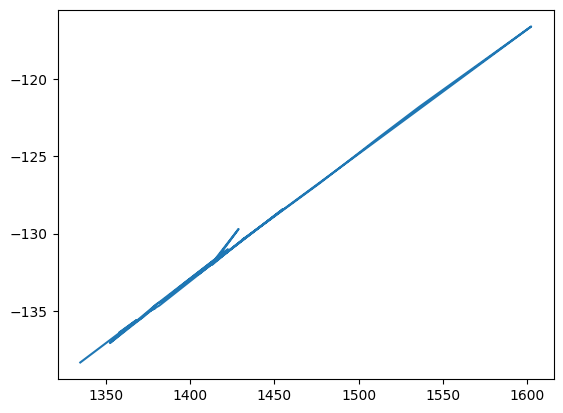

In [ ]:
print("Line graph: ")
plt.plot(resultat2["resultat_obs_x"], resultat2["resultat_obs_y"])
plt.show()

In [ ]:
coefficients = np.polyfit(resultat2["resultat_obs_x"], resultat2["resultat_obs_y"], 1)
slope = coefficients[0]
intercept = coefficients[1]

# Affichage des coefficients
print(f"Coefficient de pente (slope): {slope}")
print(f"Coefficient d'interception (intercept): {intercept}")

Coefficient de pente (slope): 0.08187328953074721
Coefficient d'interception (intercept): -247.60611145790494


In [ ]:
resultat2 = resultat2.sort_values(by='resultat_obs_x').reset_index()
resultat2 = resultat2.drop(columns= ['index'])
resultat2.head()

,jour,resultat_obs_x,resultat_obs_y
0,2023-12-07,1334.731183,-138.340580
1,2023-11-27,1352.361111,-137.079861
2,2023-12-05,1357.761905,-136.404762
3,2023-12-04,1358.269231,-136.445055
4,2023-12-06,1367.993080,-135.605536


In [ ]:
resultat2["Prediction"] = intercept + slope * resultat2["resultat_obs_x"]
resultat2["Ecart"] = abs((resultat2["Prediction"] - resultat2["resultat_obs_y"]) / resultat2["resultat_obs_y"])
resultat2.head()

,jour,resultat_obs_x,resultat_obs_y,Prediction,Ecart
0,2023-12-07,1334.731183,-138.340580,-138.327279,0.000096
1,2023-11-27,1352.361111,-137.079861,-136.883859,0.001430
2,2023-12-05,1357.761905,-136.404762,-136.441678,0.000271
3,2023-12-04,1358.269231,-136.445055,-136.400141,0.000329
4,2023-12-06,1367.993080,-135.605536,-135.604018,0.000011


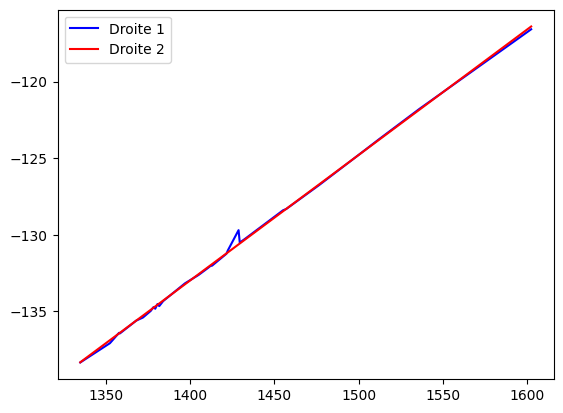

In [ ]:
plt.plot(resultat2["resultat_obs_x"], resultat2["resultat_obs_y"], label='Droite 1', color='blue')
plt.plot(resultat2["resultat_obs_x"], resultat2["Prediction"], label='Droite 2', color='red')
plt.legend()
plt.show()

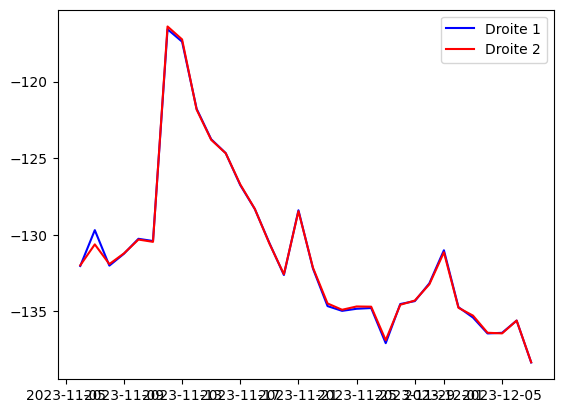

In [ ]:
resultat2['jour'] = pd.to_datetime(resultat2['jour'])
resultat2_bis = resultat2.sort_values(by='jour')
plt.plot(resultat2_bis["jour"], resultat2_bis["resultat_obs_y"], label='Droite 1', color='blue')
plt.plot(resultat2_bis["jour"], resultat2_bis["Prediction"], label='Droite 2', color='red')
plt.legend()
plt.show()

In [ ]:
print(resultat2.shape[0])

32


In [ ]:
df3.head()

,code_site,code_station,date_obs_elab,resultat_obs_elab,date_prod,code_statut,libelle_statut,code_methode,libelle_methode,code_qualification,libelle_qualification,longitude,latitude,grandeur_hydro_elab
0,Y2510020,Y251002001,07/01/2023,686.0,2023-02-06T09:46:36Z,12,DonnÃ©e prÃ©-validÃ©e,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
1,Y2510020,Y251002001,08/01/2023,666.0,2023-02-06T09:46:36Z,12,DonnÃ©e prÃ©-validÃ©e,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
2,Y2510020,Y251002001,09/01/2023,674.0,2023-02-06T09:46:36Z,12,DonnÃ©e prÃ©-validÃ©e,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
3,Y2510020,Y251002001,10/01/2023,752.0,2023-02-06T09:46:36Z,12,DonnÃ©e prÃ©-validÃ©e,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
4,Y2510020,Y251002001,11/01/2023,691.0,2023-02-06T09:46:36Z,12,DonnÃ©e prÃ©-validÃ©e,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ


In [ ]:
df3.tail()

,code_site,code_station,date_obs_elab,resultat_obs_elab,date_prod,code_statut,libelle_statut,code_methode,libelle_methode,code_qualification,libelle_qualification,longitude,latitude,grandeur_hydro_elab
330,Y2510020,Y251002001,03/12/2023,1370.0,2023-12-04T00:02:35Z,4,DonnÃ©e brute,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
331,Y2510020,Y251002001,04/12/2023,1360.0,2023-12-05T06:34:58Z,4,DonnÃ©e brute,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
332,Y2510020,Y251002001,05/12/2023,1356.0,2023-12-06T00:02:44Z,4,DonnÃ©e brute,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
333,Y2510020,Y251002001,06/12/2023,1368.0,2023-12-07T00:07:15Z,4,DonnÃ©e brute,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ
334,Y2510020,Y251002001,07/12/2023,1335.0,2023-12-08T00:02:33Z,4,DonnÃ©e brute,12,Interpolation,12,Douteuse,3.157282,43.61603,QmJ


In [ ]:
df3 = df3.drop(columns= ['code_site', 'date_prod', 'code_statut', 'libelle_statut', 'code_methode', 'libelle_methode', 'code_qualification', 'libelle_qualification', 'longitude', 'latitude', 'grandeur_hydro_elab'])
df3.head()

,code_station,date_obs_elab,resultat_obs_elab
0,Y251002001,07/01/2023,686.0
1,Y251002001,08/01/2023,666.0
2,Y251002001,09/01/2023,674.0
3,Y251002001,10/01/2023,752.0
4,Y251002001,11/01/2023,691.0


In [ ]:
print(df3.shape[0])

335


In [ ]:
df3["Prediction"] = intercept + slope * df3["resultat_obs_elab"]
df3.head()

,code_station,date_obs_elab,resultat_obs_elab,Prediction
0,Y251002001,07/01/2023,686.0,-191.441035
1,Y251002001,08/01/2023,666.0,-193.078501
2,Y251002001,09/01/2023,674.0,-192.423514
3,Y251002001,10/01/2023,752.0,-186.037398
4,Y251002001,11/01/2023,691.0,-191.031668


In [ ]:
resultat2['jour'] = pd.to_datetime(resultat2['jour'])
test = resultat2.sort_values(by='jour')
test.head()

,jour,resultat_obs_x,resultat_obs_y,Prediction,Ecart
16,2023-11-06,1412.073171,-132.039634,-131.995036,0.000338
20,2023-11-07,1428.750000,-129.700000,-130.629649,0.007168
17,2023-11-08,1413.031359,-132.017422,-131.916586,0.000764
18,2023-11-09,1421.527778,-131.243056,-131.220956,0.000168
23,2023-11-10,1432.613240,-130.264808,-130.313353,0.000373


In [ ]:
print(max(df3["Prediction"]))

8926.21410717279


In [ ]:
max = df3.loc[df3['Prediction'] == max(df3["Prediction"])]
max

,code_station,date_obs_elab,resultat_obs_elab,Prediction
252,Y251002001,16/09/2023,112049.0,8926.214107


Line graph: 


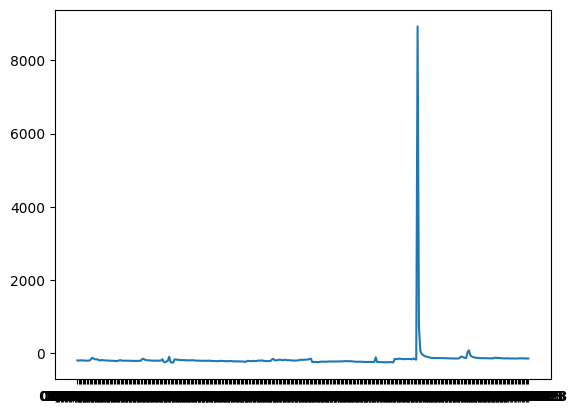

In [ ]:
print("Line graph: ")
plt.figure()
plt.plot(df3["date_obs_elab"], df3["Prediction"])
plt.show()